In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("simulation"))))
import cusum_chart
import Configurations
from utils import modelUtils
from utils import plotUtils
from simulation import simulationProfile as profiles
import random
from tensorflow import keras
import keras.layers as layers
from matplotlib import pyplot as plt
import numpy  as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.layers import Input,Dense
from keras.models import Model

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
main dir: ../


In [2]:
#profiles
#profiles.setProfile_7x_m13_randShift()
#profiles.setProfile_7x_m08_randShift()
#profiles.setProfile_7x_m04_randShift()
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables
x, y, test_x, test_y = modelUtils.getTrainAndTestData()

In [3]:
chart=x[1]
plotUtils.figsize= 10
cusum_chart.print_cusum(chart)
S_o_max,S_u_min=cusum_chart.predict(chart)
print(S_o_max,S_u_min)
print(cusum_chart.get_So_Su(chart,0,-10))

NameError: name 'x' is not defined

(0, -5.780202871399054)

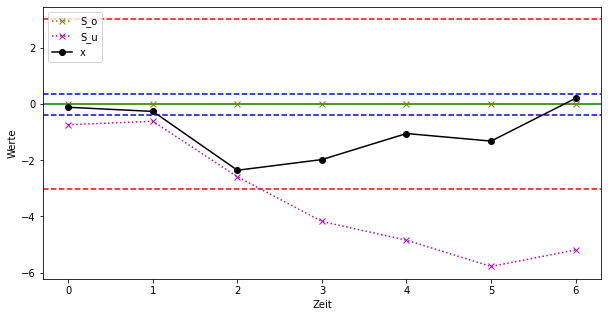

In [4]:
cusum_chart.print_cusum_withHistory(chart,0.0,-1.0)

In [3]:
x,y=cusum_chart.calculate_So_Su(x)
test_x, test_y=cusum_chart.calculate_So_Su(test_x)
print(x[0])
print(y[0])

[-0.98272584 -0.61502263 -1.28536848 -1.18599955 -0.67566305 -1.98160589
 -1.38721319  0.         -5.46784733]
[ 0.         -5.46784733]


In [5]:
# _,y=cusum_chart.calculate_withoutHistory_So_Su(x)
# _, test_y=cusum_chart.calculate_withoutHistory_So_Su(test_x)
# print(x[0],y[0])

[-0.26955499 -0.33253966  3.12308397  3.80631962  4.819875    5.87775616
  6.38627926] [22.12349164  0.        ]


In [15]:
neuralInputsNumber = len(x[0])
targetVarNumber = len(y[0])

model = keras.Sequential([
    keras.layers.Input( shape=(neuralInputsNumber),name="Eingabeschicht"),
    keras.layers.Dense(175, activation=keras.activations.relu),
    keras.layers.Dense(175,  activation=keras.activations.relu),
    keras.layers.Dense(175,  activation=keras.activations.relu),

   # keras.layers.Dense(75,  activation=keras.activations.linear4"),
    keras.layers.Dense(targetVarNumber, activation=keras.activations.linear,name="Ausgabeschicht")])
model.compile(optimizer="adam",
              #loss='MeanSquaredError',
              loss='MeanSquaredError',
              metrics=['accuracy'])
history = model.fit(x, y, batch_size=32 ,epochs=50,validation_data=(test_x, test_y))

print("EVALUATION")
model.evaluate(test_x, test_y)

Epoch 1/50
157/157 [==============================] - 1s 2ms/step - loss: 58.5695 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 1.0000
Epoch 2/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 4/50
157/157 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 6/50
157/157 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch

[0.08731087297201157, 1.0]

In [14]:
print(y[0])
print(x[0])

[ 0.         -0.69623335]
[-0.65922529 -0.72678758  0.28104558 -1.03314661  0.2324567   0.17303574
 -1.07419782  0.         -0.69623335]


In [16]:
a = random.randrange(0,5000)
#print(test_x[a])
print(test_y[a])
result = model.predict(test_x[a:a+1])
print(result)
#model.save("sdf.h5")

print("mean_absolute_error:")
print(mean_absolute_error(test_y, model.predict(test_x)))
#print(mean_absolute_error(Z, res))


[ 19.71135686 -87.62017572]
[[ 20.328548 -88.06005 ]]
mean_absolute_error:
0.2182190590605879


In [ ]:
x,y=cusum_chart.calculateAndAdd_So_Su(x,y)
test_x, test_y=cusum_chart.calculateAndAdd_So_Su(test_x, test_y)
print(x[0])
print(y[0])

In [160]:
# Define model layers.


neuralInputsNumber = len(x[0])
Y= y[:,0:5]
Z = y[:,5:7]
input_layer = Input(shape=(neuralInputsNumber),name="Eingabeschicht")
first_dense = Dense(75, activation='relu')(input_layer)
second_dense = Dense(75, activation='relu')(first_dense)
# Y1 output will be fed from the first dense
y1_output = Dense(5, name='chart',activation='sigmoid')(second_dense)

second_dense = Dense(175,activation='relu')(first_dense)
third_dense = Dense(175,activation='relu')(second_dense)
# Y2 output will be fed from the second dense
y2_output = Dense(2,name='cusum')(third_dense)

#Define the model with the input layer 
# and a list of output layers
model = Model(inputs=input_layer,outputs=[y1_output, y2_output])



Epoch 1/150
500/500 [==============================] - 1s 666us/step - loss: 1.3416 - chart_loss: 0.3375 - cusum_loss: 1.0042 - chart_accuracy: 0.6180 - cusum_mean_absolute_error: 1.0042
Epoch 2/150
500/500 [==============================] - 0s 695us/step - loss: 0.5776 - chart_loss: 0.2020 - cusum_loss: 0.3756 - chart_accuracy: 0.7910 - cusum_mean_absolute_error: 0.3756
Epoch 3/150
500/500 [==============================] - 0s 746us/step - loss: 0.4972 - chart_loss: 0.1539 - cusum_loss: 0.3433 - chart_accuracy: 0.8642 - cusum_mean_absolute_error: 0.3433
Epoch 4/150
500/500 [==============================] - 0s 808us/step - loss: 0.4473 - chart_loss: 0.1250 - cusum_loss: 0.3223 - chart_accuracy: 0.9010 - cusum_mean_absolute_error: 0.3223
Epoch 5/150
500/500 [==============================] - 0s 708us/step - loss: 0.4278 - chart_loss: 0.1059 - cusum_loss: 0.3219 - chart_accuracy: 0.9176 - cusum_mean_absolute_error: 0.3219
Epoch 6/150
500/500 [==============================] - 0s 734us/s

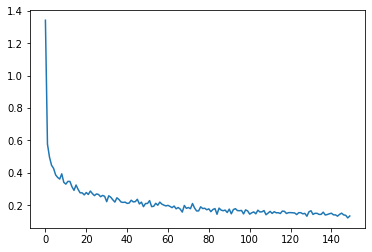

In [161]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = keras.optimizers.SGD(lr=0.001)

model.compile(optimizer="adam",
              loss={'chart': 'binary_crossentropy', 'cusum': 'mean_absolute_error'},
 metrics={'chart':'accuracy',
          'cusum':keras.metrics.MeanAbsoluteError()})
# Train the model for 100 epochs
history = model.fit(x, {'chart': Y, 'cusum': Z},
   epochs=150, batch_size=10)

plt.plot(history.history['loss'])

In [165]:
# Specify the optimizer, and compile the model with loss functions for both outputs

model.compile(optimizer="adam",
              loss={'chart': 'binary_crossentropy', 'cusum': 'mse'},
 metrics={'chart':'accuracy',
          'cusum':keras.metrics.RootMeanSquaredError()})
# Train the model for 100 epochs
history = model.fit(x, {'chart': Y, 'cusum': Z},
   epochs=200, batch_size=10)

plt.plot(history.history['loss'])

Epoch 1/200
500/500 [==============================] - 1s 763us/step - loss: 0.0464 - chart_loss: 0.0109 - cusum_loss: 0.0354 - chart_accuracy: 0.9900 - cusum_root_mean_squared_error: 0.1882
Epoch 2/200
500/500 [==============================] - 0s 652us/step - loss: 0.0839 - chart_loss: 0.0128 - cusum_loss: 0.0711 - chart_accuracy: 0.9896 - cusum_root_mean_squared_error: 0.2667
Epoch 3/200
500/500 [==============================] - 0s 740us/step - loss: 0.0252 - chart_loss: 0.0104 - cusum_loss: 0.0148 - chart_accuracy: 0.9922 - cusum_root_mean_squared_error: 0.1218
Epoch 4/200
500/500 [==============================] - 0s 721us/step - loss: 0.0738 - chart_loss: 0.0106 - cusum_loss: 0.0632 - chart_accuracy: 0.9898 - cusum_root_mean_squared_error: 0.2514
Epoch 5/200
500/500 [==============================] - 0s 798us/step - loss: 0.0213 - chart_loss: 0.0149 - cusum_loss: 0.0064 - chart_accuracy: 0.9876 - cusum_root_mean_squared_error: 0.0798
Epoch 6/200
500/500 [========================

In [122]:
#test
a = random.randrange(0,5000)
#print(test_x[a])

print(test_y[a])
result = model.predict(test_x[a:a+1])
tmp = [0,0,0,0,0]
tmp[np.argmax(result[0])]=1
print(tmp)
print(result[1])
#model.save("multi.h5")

[ 0.          0.          1.          0.          0.         12.38741156
  0.        ]
[0, 0, 1, 0, 0]
[[12.366059   -0.03156763]]


In [102]:
def correctError(predictions):
    results=[]
    for i in range(len(predictions)):
        s_o= predictions[i][0] if(predictions[i][0]>=0) else 0
        s_u= predictions[i][1] if(predictions[i][1]<=0) else 0
        results.append([s_o,s_u])
    return results

In [ ]:
Z_pred = model.predict(test_x)

print(Z_pred[1])
res = correctError(Z_pred[1])


print(Z_pred[1][0][1])
print(round(Z_pred[1][0][1], -3))

In [163]:

#mse
#mean_squared_error(Z, Z_pred[1], squared=False)
print(mean_squared_error(Z, Z_pred[1]))
print(mean_squared_error(Z, res))
#rmse
print(mean_squared_error(Z, Z_pred[1], squared=False))
print(mean_squared_error(Z, res, squared=False))



1154.169331157001
1154.1676131862841
33.88604875827807
33.886021705681806


In [164]:
#mae

print(mean_absolute_error(Z, Z_pred[1]))
print(mean_absolute_error(Z, res))


23.990922338284484
23.99088822499581
